<a href="https://colab.research.google.com/github/debjitl45/Loan-Prediction-Classification/blob/master/Loan_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv(r"train_data.csv")
test=pd.read_csv(r"test_data.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

In [7]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [8]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
data = pd.concat([train,test])

In [10]:
data.drop("Loan_ID",axis=1,inplace=True)

In [11]:
data.shape

(981, 12)

In [12]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

# Data Cleaning

In [14]:
lis = ['Credit_History','Dependents','Gender','LoanAmount','Loan_Amount_Term','Married','Self_Employed']
for i in lis:
    z = (data[i].isnull().sum())/981
    print(f"{i} = {z}")

Credit_History = 0.08053007135575943
Dependents = 0.0254841997961264
Gender = 0.024464831804281346
LoanAmount = 0.027522935779816515
Loan_Amount_Term = 0.020387359836901122
Married = 0.0030581039755351682
Self_Employed = 0.05606523955147808


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [17]:
for i in [data]:
  i["Gender"]=i["Gender"].fillna(data.Gender.dropna().mode()[0])
  i["Married"]=i["Married"].fillna(data.Married.dropna().mode()[0])
  i["Dependents"]=i["Dependents"].fillna(data.Dependents.dropna().mode()[0])
  i["Self_Employed"]=i["Self_Employed"].fillna(data.Self_Employed.dropna().mode()[0])
  i["Credit_History"]=i["Credit_History"].fillna(data.Credit_History.dropna().mode()[0])
  i["LoanAmount"]=i["LoanAmount"].fillna(data.Credit_History.dropna().mode()[0])
  i["Loan_Amount_Term"]=i["Loan_Amount_Term"].fillna(data.Credit_History.dropna().mode()[0])

In [18]:
ordinal_var=['Education','Dependents','Property_Area']

## Converting categorical variables to numerical variables

In [19]:
for i in [data]:
  i["Gender"]=i["Gender"].map({"Male":0,"Female":1}).astype(int)
  i["Married"]=i["Married"].map({"No":0,"Yes":1}).astype(int)
  i["Education"]=i["Education"].map({"Not Graduate":0,"Graduate":1}).astype(int)
  i["Self_Employed"]=i["Self_Employed"].map({"No":0,"Yes":1}).astype(int)
  i["Credit_History"]=i["Credit_History"].astype(int)

In [20]:
for i in [data]:
  i["Property_Area"]=i["Property_Area"].map({"Urban":0,"Rural":1,"Semiurban":2}).astype(int)
  i["Dependents"]=i["Dependents"].map({"0":0,"1":1,"2":2,"3+":3}).astype(int)

#### We map the values so that we can input the train data into the model as the model does not accept any string values.

In [21]:
new_train = data.iloc[:614]
new_test = data.iloc[614:]

In [22]:
new_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,1.0,360.0,1,0,Y
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1,1,N
2,0,1,0,1,1,3000,0.0,66.0,360.0,1,0,Y
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1,0,Y
4,0,0,0,1,0,6000,0.0,141.0,360.0,1,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1,1,Y
610,0,1,3,1,0,4106,0.0,40.0,180.0,1,1,Y
611,0,1,1,1,0,8072,240.0,253.0,360.0,1,0,Y
612,0,1,2,1,0,7583,0.0,187.0,360.0,1,0,Y


In [34]:
new_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

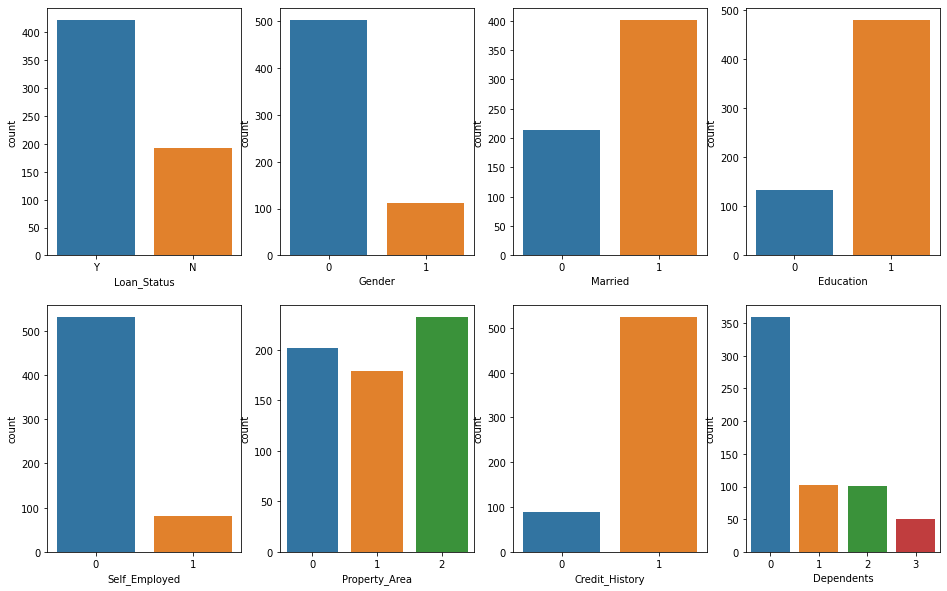

In [23]:
fig, ax=plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status',data=new_train,ax=ax[0][0])
sns.countplot('Gender',data=new_train,ax=ax[0][1])
sns.countplot('Married',data=new_train,ax=ax[0][2])
sns.countplot('Education',data=new_train,ax=ax[0][3])
sns.countplot('Self_Employed',data=new_train,ax=ax[1][0])
sns.countplot('Property_Area',data=new_train,ax=ax[1][1])
sns.countplot('Credit_History',data=new_train,ax=ax[1][2])
sns.countplot('Dependents',data=new_train,ax=ax[1][3])

In [24]:
new_train['Loan_Status'].value_counts(normalize=True) # Around 69 percent of the loans are approved

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


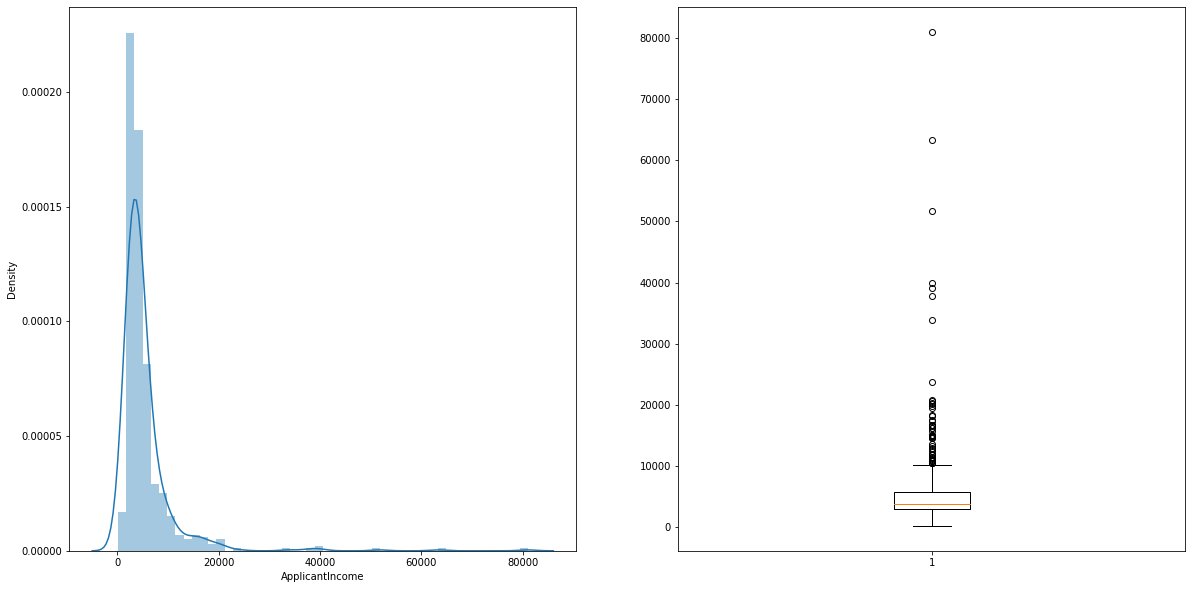

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(train['ApplicantIncome'])
plt.subplot(1,2,2)
plt.boxplot(train['ApplicantIncome'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


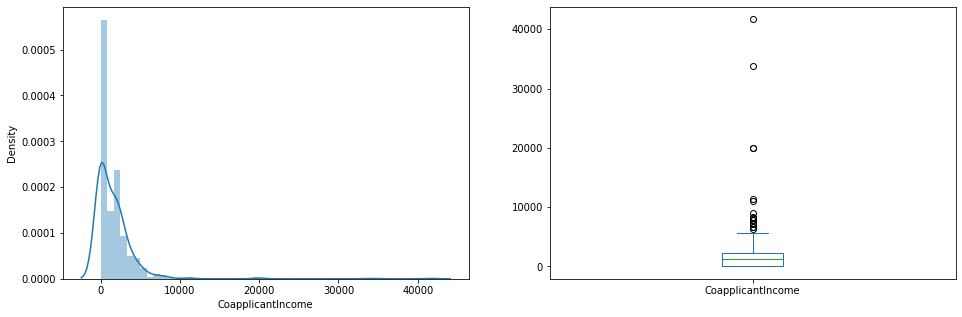

In [26]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

## Observations:
1. More Loans are approved Vs Rejected (69 percent of the loans are approved)

2. Count of Male applicants is 5 times more than Female

3. Count of Married applicant is double than that of Non-married

4. Count of graduate is more than non-Graduates

5. Count of self-employed is less than that of Non-Self-employed

6. Maximum properties are located in Semiurban areas but urban and rural are not that far.

7. Credit History is present for many applicants

8. The count of applicants with several dependents=0 is maximum and is almost 4 times more than the other.

9. The Applicant Income isn't normally distributed which is visible throught he normal distribution and the box plot. The Box plot confirms the outliers present in it

10. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

# Bivariate Analysis

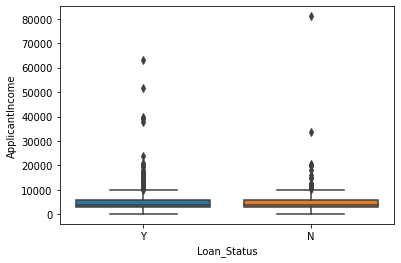

In [27]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=new_train)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, ' ')

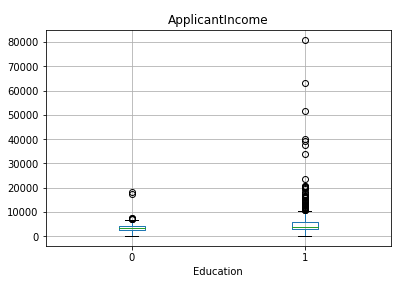

In [28]:
new_train.boxplot(column='ApplicantIncome' ,by='Education')
plt.suptitle(" ")

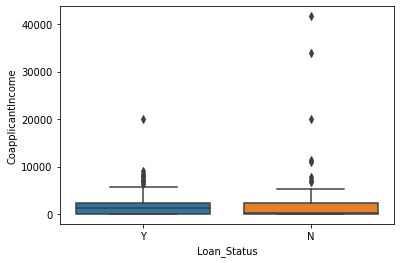

In [29]:
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=new_train)

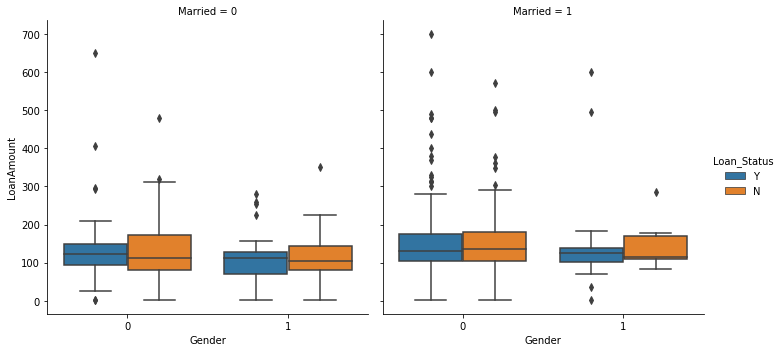

In [30]:
sns.catplot(x='Gender',y='LoanAmount',data=new_train,kind='box',hue='Loan_Status',col='Married')

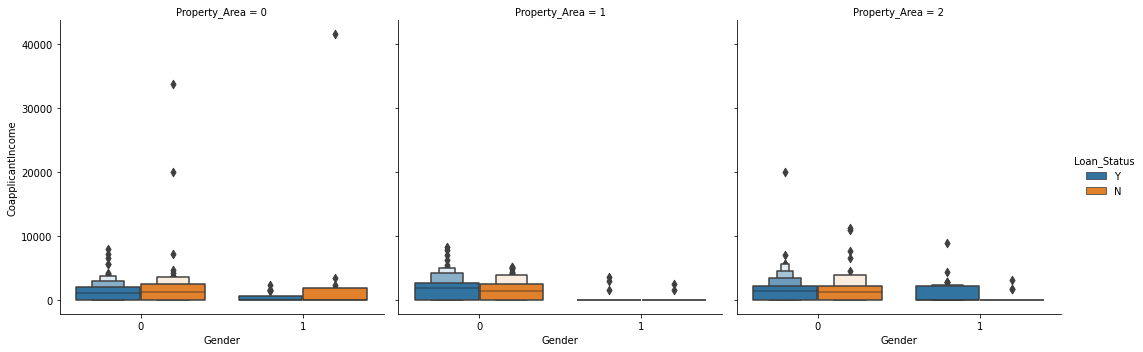

In [31]:
sns.catplot(x='Gender',y='CoapplicantIncome',data=new_train,kind='boxen',hue='Loan_Status',col='Property_Area')

## Observations
1. Mean ApplicantIncome of 0 and 1 are almost the same (o: no,1: Yes)
2. Mean Co- ApplicantIncome of 1 is slightly more than 0 (o: no,1 Yes)
3. The mean value of Loan Amount applied by males (0) is slightly higher than Females(1).
4. If you are married then the loan amount requested is slightly higher than non-married.
5. Male have higher Co-applicant income than females in all three property areas.
6. We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.


# Heatmap

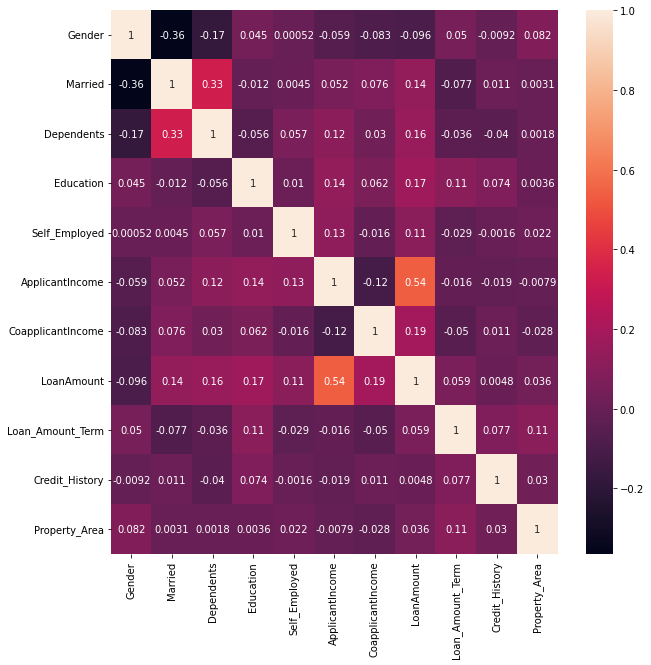

In [32]:
plt.figure(figsize=(10,10))
corr_matrix=new_train.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

## Observations
1. loan Status is highly correlated with credit history 
2. applicant Income and loan amount are highly correlated loan amount 
3. total income is highly correlated Loan amount is highly correlated with coappicant income

# Handling Outliers 

In [38]:
new_train['LoanAmountLog']=np.log(new_train['LoanAmount'])
new_test['LoanAmountLog']=np.log(new_test['LoanAmount'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# **Machine Learning**

In [41]:
#overview of the cleaned training data
new_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog
0,0,0,0,1,0,5849,0.0,1.0,360.0,1,0,Y,0.000000
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1,1,N,4.852030
2,0,1,0,1,1,3000,0.0,66.0,360.0,1,0,Y,4.189655
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1,0,Y,4.787492
4,0,0,0,1,0,6000,0.0,141.0,360.0,1,0,Y,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1,1,Y,4.262680
610,0,1,3,1,0,4106,0.0,40.0,180.0,1,1,Y,3.688879
611,0,1,1,1,0,8072,240.0,253.0,360.0,1,0,Y,5.533389
612,0,1,2,1,0,7583,0.0,187.0,360.0,1,0,Y,5.231109


In [42]:
#overview of the cleaned testing data
#observe that the Loan Status are NaN which can be dropped as we dont need it
new_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog
0,0,1,0,1,0,5720,0.0,110.0,360.0,1,0,NaN,4.700480
1,0,1,1,1,0,3076,1500.0,126.0,360.0,1,0,NaN,4.836282
2,0,1,2,1,0,5000,1800.0,208.0,360.0,1,0,NaN,5.337538
3,0,1,2,1,0,2340,2546.0,100.0,360.0,1,0,NaN,4.605170
4,0,0,0,0,0,3276,0.0,78.0,360.0,1,0,NaN,4.356709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,3,0,1,4009,1777.0,113.0,360.0,1,0,NaN,4.727388
363,0,1,0,1,0,4158,709.0,115.0,360.0,1,0,NaN,4.744932
364,0,0,0,1,0,3250,1993.0,126.0,360.0,1,2,NaN,4.836282
365,0,1,0,1,0,5000,2393.0,158.0,360.0,1,1,NaN,5.062595


In [43]:
#Loan Status dropped from new_test
new_test= new_test.drop(['Loan_Status'],axis=1)
new_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmountLog
0,0,1,0,1,0,5720,0.0,110.0,360.0,1,0,4.700480
1,0,1,1,1,0,3076,1500.0,126.0,360.0,1,0,4.836282
2,0,1,2,1,0,5000,1800.0,208.0,360.0,1,0,5.337538
3,0,1,2,1,0,2340,2546.0,100.0,360.0,1,0,4.605170
4,0,0,0,0,0,3276,0.0,78.0,360.0,1,0,4.356709
...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,3,0,1,4009,1777.0,113.0,360.0,1,0,4.727388
363,0,1,0,1,0,4158,709.0,115.0,360.0,1,0,4.744932
364,0,0,0,1,0,3250,1993.0,126.0,360.0,1,2,4.836282
365,0,1,0,1,0,5000,2393.0,158.0,360.0,1,1,5.062595


In [46]:
#dim of the dataset before using it for the ML model
new_train.shape, new_test.shape

((614, 13), (367, 12))

In [47]:
#spliting input and output of train data
X_train=new_train.drop(['Loan_Status'],axis=1)
y_train=new_train['Loan_Status']

In [88]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, train_size=0.8, random_state=42)

# **XGB Classfier**

In [90]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# fit model no training data
model = XGBClassifier()

In [91]:
model.fit(X_train, y_train)

# make predictions for train data
y_pred = model.predict(X_train)

# evaluate predictions for train data
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy on train: %.2f%%" % (accuracy * 100.0))

# make predictions for test data
y_pred = model.predict(X_validation)

# evaluate predictions for test data
accuracy = accuracy_score(y_validation, y_pred)
print("Accuracy on test: %.2f%%" % (accuracy * 100.0))

Accuracy on train: 89.50%
Accuracy on test: 85.45%


# **Random Forest Classifier**

In [92]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [93]:
model.fit(X_train, y_train)

# make predictions for train data
y_pred = model.predict(X_train)

# evaluate predictions for train data
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy on train: %.2f%%" % (accuracy * 100.0))

# make predictions for test data
y_pred = model.predict(X_validation)

# evaluate predictions for test data
accuracy = accuracy_score(y_validation, y_pred)
print("Accuracy on test: %.2f%%" % (accuracy * 100.0))

Accuracy on train: 100.00%
Accuracy on test: 83.64%


# **Logistic Regression**

In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2',solver='lbfgs')

In [102]:
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_validation)

# evaluate predictions
accuracy = accuracy_score(y_validation, y_pred)
print("Accuracy on test: %.2f%%" % (accuracy * 100.0))

# make predictions for train data
y_pred = model.predict(X_train)

# evaluate predictions
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy on train: %.2f%%" % (accuracy * 100.0))

Accuracy on test: 87.27%
Accuracy on train: 79.45%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Observation

*   Logistic Regression gave max accuracy of 87% on test data.
*   Followed by XGB Classifier which gave 85% on test data.










In [103]:
# number of Loan Approved and Rejected
x = np.array(y_pred)
unique, counts = np.unique(x, return_counts=True)

In [104]:
print(np.asarray((unique, counts)).T)

[['N' 34]
 ['Y' 185]]


In [105]:
y_pred=model.predict(new_test)

In [106]:
# to view, download the results of the ML model in csv
output= pd.DataFrame({'Loan_ID':test['Loan_ID'],'Loan_Status':y_pred})
output.replace(1,'Y', inplace = True)
output.replace(0,'N', inplace=True)
output.to_csv('results.csv', index=False)

In [107]:
output.Loan_Status.value_counts()

Y    316
N     51
Name: Loan_Status, dtype: int64